In [18]:

# Import packs
import numpy as np
import os
                                # 에러: from scipy.misc import imread, imresize
from skimage import io
from skimage.transform import resize

import matplotlib.pyplot as plt
import skimage.io
import skimage.transform
# import tensorflow as tf

%matplotlib inline  

print ("Packs loaded")

Packs loaded


In [4]:
# Print Current Folder 
cwd = os.getcwd()
print ("Current folder is %s" % (cwd) ) 

# Useful function
def print_typeshape(img):
    print("Type is %s" % (type(img)))
    print("Shape is %s" % (img.shape,))

Current folder is /Users/igyuseog/Documents/깃허브/Career/2021년 여름방학


# Load & Plot

Type is <class 'numpy.ndarray'>
Shape is (413, 620, 3)


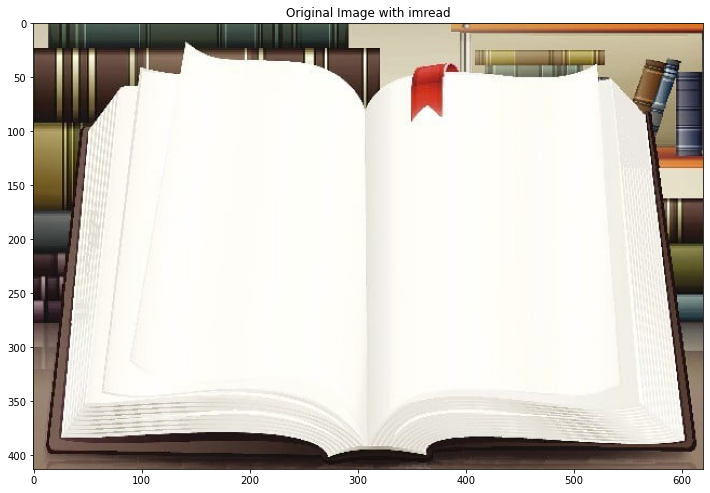

In [11]:
# Load 
cat = io.imread(cwd + "/data/book.jpg")
print_typeshape(cat)
# Plot

plt.figure(figsize = (12,12))
plt.imshow(cat)
plt.title("Original Image with imread")
plt.draw()

#### 소수점 추가

Type is <class 'numpy.ndarray'>
Shape is (413, 620, 3)


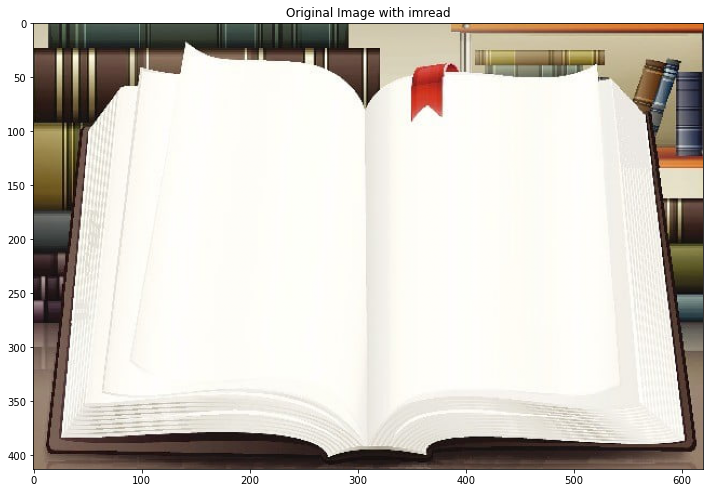

In [15]:
# Load 
cat = io.imread(cwd + "/data/book.jpg").astype(np.float) / 255 # RGB는 0 ~ 255 값이기 때문이다.
print_typeshape(cat)
# Plot

plt.figure(figsize = (12,12))
plt.imshow(cat)
plt.title("Original Image with imread")
plt.draw()

# Resize

Type is <class 'numpy.ndarray'>
Shape is (100, 100, 3)


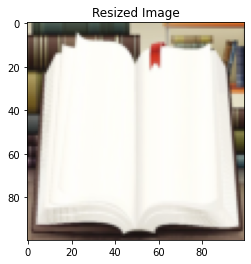

In [24]:
# resize
catsmall = resize(cat, [100,100])
print_typeshape(catsmall)

# plot
plt.figure(1)
plt.imshow(catsmall)
plt.title("Resized Image")
plt.show()


# Grey Scale

In [29]:
def rgb2gray(rgb):
    if len(rgb.shape) == 3:
        return np.dot(rgb[...,:3], [0.299, 0.587, 0.114]) # 100*100*3 과 1*3이 곱해져서 100*100이 되네..?
    else:
        print("Current Image if Gray")
        return rgb
    
catsmallgray = rgb2gray(catsmall)
print_typeshape(catsmallgray)

Type is <class 'numpy.ndarray'>
Shape is (100, 100)


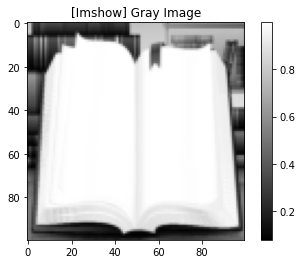

In [38]:
plt.figure(1)
plt.imshow(catsmallgray, cmap = plt.get_cmap("gray"))
plt.title("[Imshow] Gray Image")
plt.colorbar()
plt.draw()


# Reshape

Type is <class 'numpy.ndarray'>
Shape is (1, 10000)
Type is <class 'numpy.ndarray'>
Shape is (100, 100)


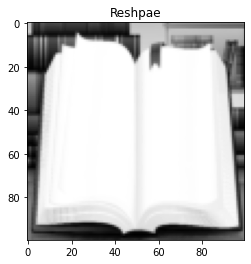

In [43]:
catrowvec = np.reshape(catsmallgray, (1,-1))
print_typeshape(catrowvec)

catmatrix = np.reshape(catrowvec, (100,-1))
print_typeshape(catmatrix)

plt.figure(1)
plt.imshow(catmatrix, cmap = "gray")
plt.title("Reshpae")
plt.show()

# Load from folder

In [47]:
# 경로 설정
cwd = os.getcwd()
path = cwd + "/data/image/"

# 폴더 안에 들여다보기
flist = os.listdir(path)
print(len(flist), path)

4 /Users/igyuseog/Documents/깃허브/Career/2021년 여름방학/data/image/


In [63]:
valid_exts = [".jpg", ".gif",".png",".tga",".jpeg"]
imgs= []
names = []
for f in flist:
    name, ext = os.path.splitext(f)
    if ext.lower() not in valid_exts:
        continue
        
    # 추가하기   
    fullpath = os.path.join(path, f)
    imgs.append(io.imread(fullpath))
    names.append(name + ext)

print("%d images loaded" % (len(imgs)))
    

3 images loaded


In [69]:
# check
for i in range(len(names)):
    print(names[i])
    print_typeshape(imgs[i])
    print()

samgyu.png
Type is <class 'numpy.ndarray'>
Shape is (650, 650, 3)

chicken.jpeg
Type is <class 'numpy.ndarray'>
Shape is (900, 1200, 3)

cutllet.jpeg
Type is <class 'numpy.ndarray'>
Shape is (546, 728, 3)



<Figure size 432x288 with 0 Axes>

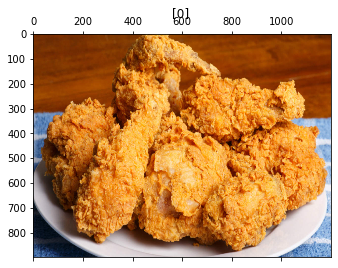

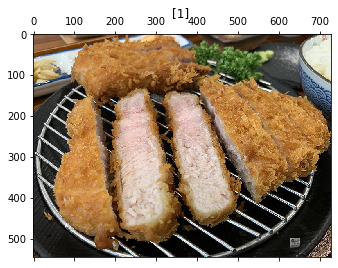

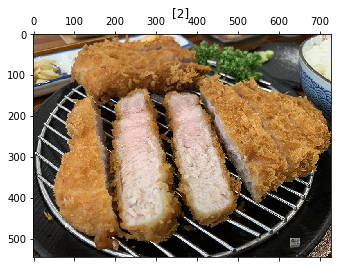

In [106]:
nimgs = len(imgs)
randidx = np.sort(np.random.randint(nimgs, size=3))
for curr_img, curr_name, i \
    in zip([imgs[j] for j in randidx]
           , [names[j] for j in randidx], range(len(randidx))):
    plt.figure(i)
    plt.matshow(curr_img)
    plt.title("[" + str(i) + "] ")
    plt.draw()

# 내방식으로 한 번 불러와보기
- matshow를 사용하면 imshow에서 마지막만 나

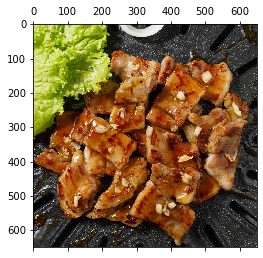

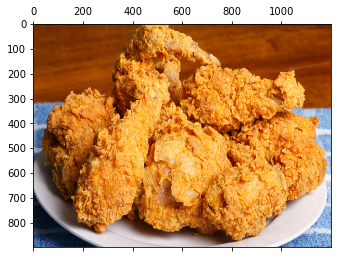

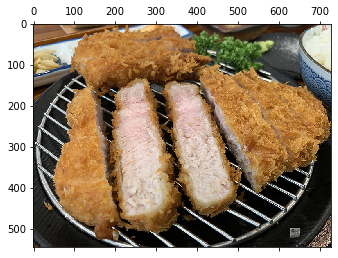

In [120]:
valid_exts = [".jpg", ".gif",".png",".tga",".jpeg"]
for f in flist:
    name,exe = os.path.splitext(f)
    if exe not in valid_exts:
        continue
    full_path = os.path.join(path,f)
    img = io.imread(full_path)
    plt.matshow(img)

<class 'numpy.ndarray'>


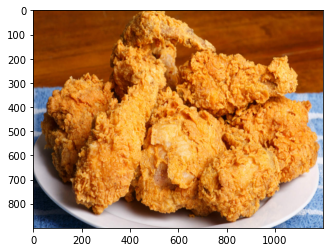

In [98]:
from torchvision.transforms import transforms
img_path = path + "chicken.jpeg"
img = io.imread(img_path) #array
print(type(img))
plt.imshow(img)

<PIL.Image.Image image mode=RGB size=1200x900 at 0x7FD3FEA36A90>


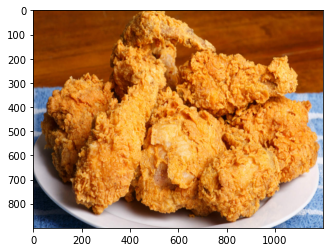

In [95]:
PIL = transforms.ToPILImage()(img)
print(PIL)
plt.imshow(PIL)

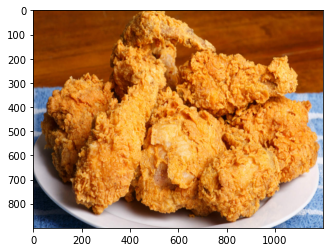

In [102]:
numpy = np.array(PIL)
plt.imshow(numpy)

tensor([[[0.4706, 0.4706, 0.4706,  ..., 0.3922, 0.3922, 0.3882],
         [0.4745, 0.4745, 0.4745,  ..., 0.3922, 0.3922, 0.3882],
         [0.4745, 0.4745, 0.4745,  ..., 0.3882, 0.3843, 0.3843],
         ...,
         [0.2353, 0.1882, 0.1725,  ..., 0.4627, 0.5216, 0.5686],
         [0.2745, 0.2353, 0.2196,  ..., 0.4431, 0.5098, 0.5725],
         [0.2980, 0.2588, 0.2510,  ..., 0.4275, 0.5020, 0.5765]],

        [[0.1804, 0.1804, 0.1804,  ..., 0.1412, 0.1412, 0.1373],
         [0.1843, 0.1843, 0.1843,  ..., 0.1412, 0.1412, 0.1373],
         [0.1843, 0.1843, 0.1843,  ..., 0.1412, 0.1373, 0.1373],
         ...,
         [0.3608, 0.3176, 0.3020,  ..., 0.6196, 0.6824, 0.7216],
         [0.4000, 0.3647, 0.3490,  ..., 0.6000, 0.6706, 0.7255],
         [0.4235, 0.3882, 0.3804,  ..., 0.5843, 0.6627, 0.7294]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0000, 0.

TypeError: Invalid shape (3, 900, 1200) for image data

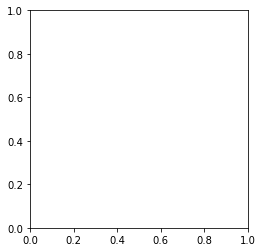

In [99]:
tensor = transforms.ToTensor()(PIL)
print(tensor)
plt.imshow(tensor)

# 정리:
- plt.imshow(이미지 or 넘파이) --> 텐서는 불가능함.
- from skimage import io --> io.imread(path)를 이용해서 이미지 읽기
- from skimage.transform import resize  -->  resize(이미지, [width, hegiht]) 형태로 이미지 사이즈 바꾸기
- 